In [101]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objects as go

from datetime import datetime
from dateutil import parser

# format float in pandas
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_columns = 30
pd.options.display.max_rows = 50
pd.options.display.width = 100

In [102]:
# print(plt.style.available)
# plt.style.library['fivethirtyeight']

plt.style.use('seaborn-white')
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.xmargin'] = 0.02
rcParams['axes.ymargin'] = 0.02
            
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = ':'
rcParams['grid.alpha'] = 0.2
rcParams['grid.color'] = 'black'
          
rcParams['figure.titlesize'] = 'x-large'
rcParams['figure.edgecolor']= 'black'
rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = [12, 8]

rcParams['ytick.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'

In [103]:
train_df = pd.read_csv('../data/train.csv')
building_df = pd.read_csv('../data/building_metadata.csv')
weather_df = pd.read_csv('../data/weather_train.csv')

In [104]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [105]:
def convert_dtype(df):
    """
    Convert data type of each column to reduce memory usage.
    """
    cols = df.columns.values
    data_types = ('int', 'float')
    
    # iterate over each column
    for col in cols:
        # convert integers
        if data_types[0] in str(df[col].dtype):
            df[col] = df[col].astype(np.int32)
        if data_types[1] in str(df[col].dtype):
            df[col] = df[col].astype(np.float16)
    return df

In [106]:
# convert dtype
train_df = convert_dtype(train_df)
weather_df = convert_dtype(weather_df)
building_df = convert_dtype(building_df)

In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int32  
 1   meter          int32  
 2   timestamp      object 
 3   meter_reading  float16
dtypes: float16(1), int32(2), object(1)
memory usage: 347.0+ MB


In [108]:
# convert dtype, categorical
building_df['primary_use'] = building_df['primary_use'].astype('category')
# building_df['year_built'] = building_df['year_built'].astype('category')

In [109]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   site_id      1449 non-null   int32   
 1   building_id  1449 non-null   int32   
 2   primary_use  1449 non-null   category
 3   square_feet  1449 non-null   int32   
 4   year_built   675 non-null    float16 
 5   floor_count  355 non-null    float16 
dtypes: category(1), float16(2), int32(3)
memory usage: 24.9 KB


# Missing Values

In [110]:
building_df.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [111]:
train_df.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

# Plots

In [112]:
building_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0000,nan
1,0,1,Education,2720,2004.0000,nan
2,0,2,Education,5376,1991.0000,nan
3,0,3,Education,23685,2002.0000,nan
4,0,4,Education,116607,1975.0000,nan


In [113]:
building_df['primary_use'].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [114]:
def plot_bar(x, y, title='', x_axis='', y_axis='', **kwargs):
    """
    Plotly Bar graph
    """
    fig = go.Figure(
        data=[go.Bar(x=x,
                     y=y)]
    )
    # update title and axis
    fig.update_layout(
        title_text = title,
        xaxis_title_text = x_axis,
        yaxis_title_text = y_axis,
        bargap=0.05,
        **kwargs
    )
    return fig

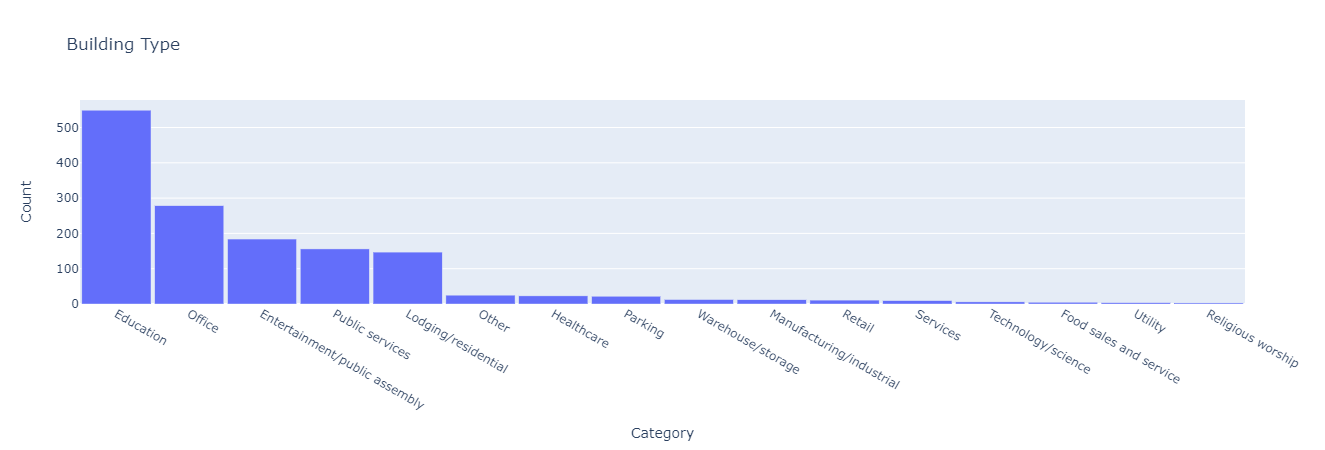

In [115]:
x_use = building_df['primary_use'].value_counts().index.values
y_count = building_df['primary_use'].value_counts().values

# fig = go.Figure(
#     data=[
#         go.Bar(x=x_use,
#                y=y_count)
#     ]
# )

# fig.update_layout(
#     title_text='Category Count', # title of plot
#     xaxis_title_text='Category', # xaxis label
#     yaxis_title_text='Count', # yaxis label
#     bargap=0.05, # gap between bars of adjacent location coordinates
# #     bargroupgap=0.5 # gap between bars of the same location coordinates
# )
# fig
plot_bar(x_use,
         y_count,
         title='Building Type',
         x_axis='Category',
         y_axis='Count'
        )

In [125]:
# year built
years = building_df['year_built'].dropna(how='any').astype(np.int16)
years = years.value_counts().sort_index()

In [133]:
# plt.figure(figsize=(20,6))
# years.plot(kind='bar', edgecolor='k')
# plt.show()

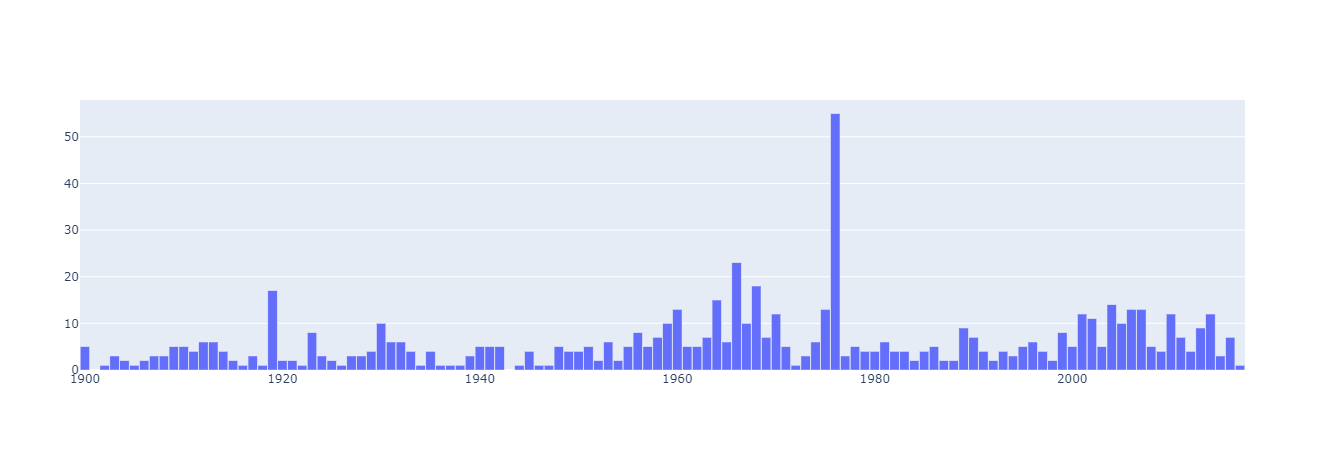

In [127]:
# bar plot 
# year built
plot_bar(x=years.index,
         y=years.values)

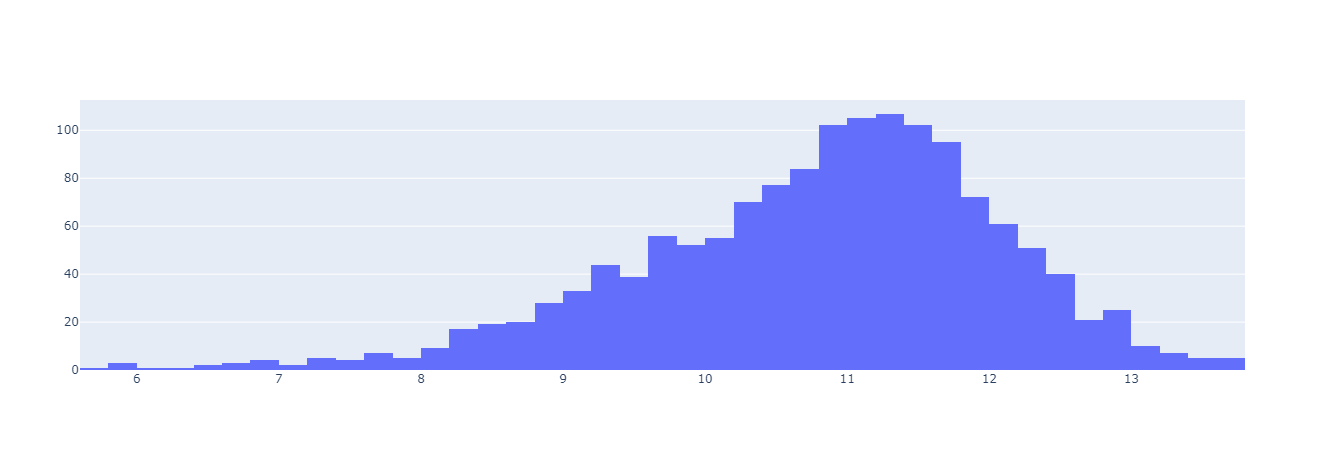

In [181]:
x = np.log(building_df.square_feet.values)
data=go.Histogram(x=x)
fig = go.Figure()
fig.add_trace(data)

In [ ]:
fig = go.Figure()
data = go.Histogram(x=train_df['meter_reading'].values)
fig.add_trace(data)